In [10]:
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(channel="ibm_quantum",token='f23a39abdbdf9d9fd0c54eb38d1e299ae7908d9d07e1adef6192100335d46f4d6f91bae1453bda226ef6f0d8d77ddac7653d233eb97d8c0ad961efd5e9100cb3')

AccountAlreadyExistsError: 'Named account (default-ibm-quantum) already exists. Set overwrite=True to overwrite.'

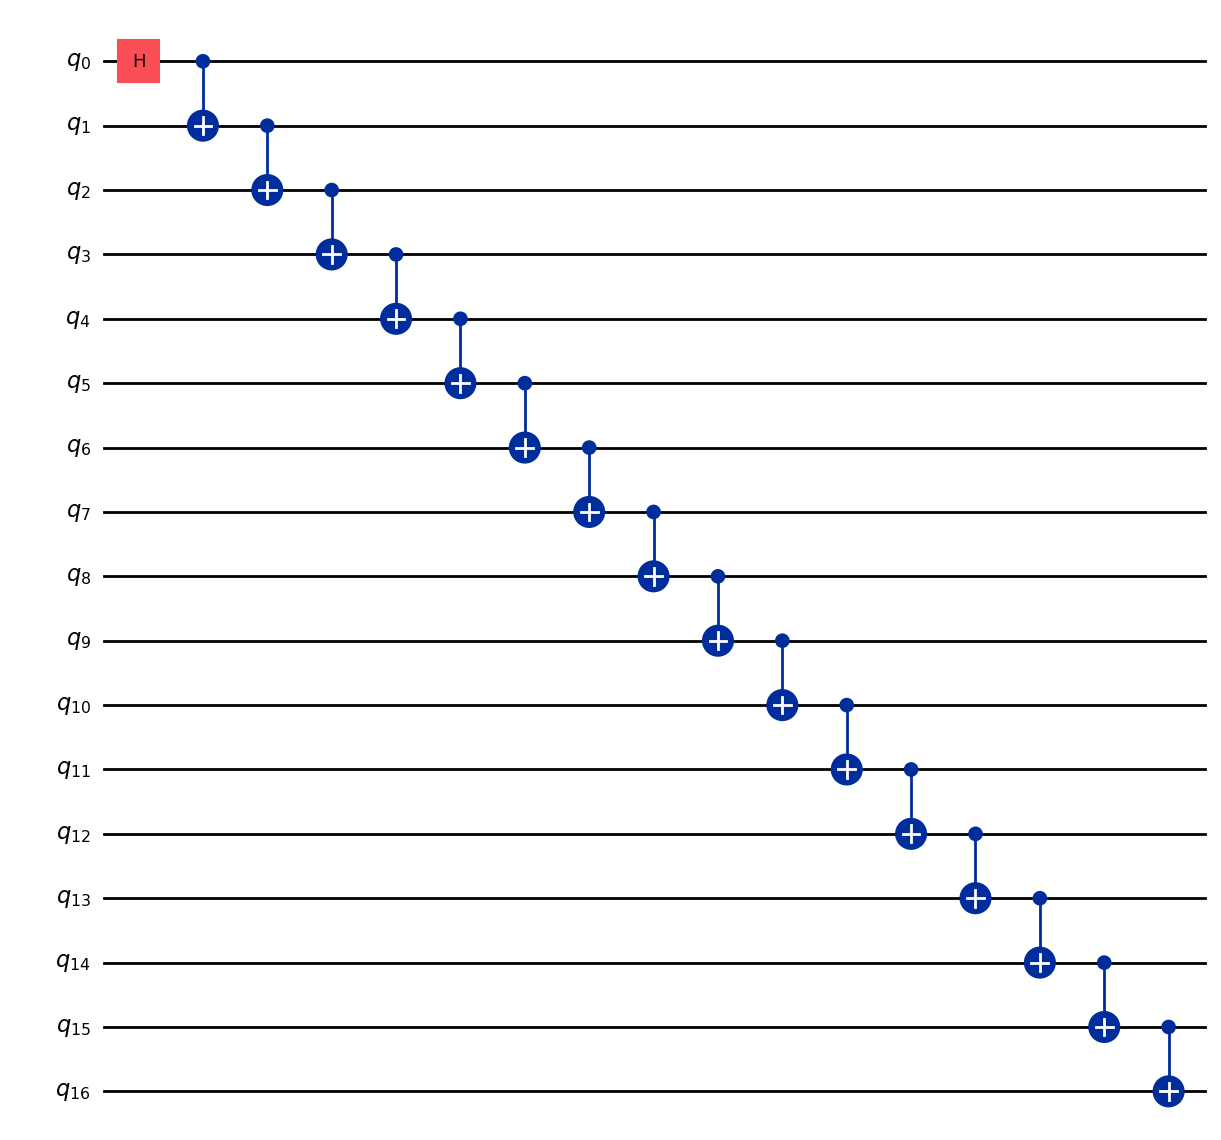

In [22]:
from qiskit import QuantumCircuit

def n_qubit_state(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for j in range(n-1):
        qc.cx(j, j+1)
    return qc
n = 17
qc = n_qubit_state(n)
qc.draw(output= 'mpl')



Note: as the qubits get further away from each other, there's an increase in the noise between them. Due to this, there's change in the expectation value

In [12]:
from qiskit.quantum_info import SparsePauliOp

operators_strings = ['Z' + 'I'*j + 'Z' + 'I'*(n-2-j) for j in range(n-1)]
print(operators_strings)
operators = [SparsePauliOp(operators_strings) for operators_strings in operators_strings]

['ZZIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIIII', 'ZIIIZIIIIIIIIIIII', 'ZIIIIZIIIIIIIIIII', 'ZIIIIIZIIIIIIIIII', 'ZIIIIIIZIIIIIIIII', 'ZIIIIIIIZIIIIIIII', 'ZIIIIIIIIZIIIIIII', 'ZIIIIIIIIIZIIIIII', 'ZIIIIIIIIIIZIIIII', 'ZIIIIIIIIIIIZIIII', 'ZIIIIIIIIIIIIZIII', 'ZIIIIIIIIIIIIIZII', 'ZIIIIIIIIIIIIIIZI', 'ZIIIIIIIIIIIIIIIZ']


In [25]:
#optimizing the problem
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.transpiler import PassManager

backend_name = "ibm_brisbane"
backend = QiskitRuntimeService().backend(backend_name)
pass_Manager = generate_preset_pass_manager(optimization_level = 1,backend = backend)
pass_manager = PassManager()
qc_transpiled = pass_manager.run(qc)
operators_transpiled_list = [op.apply_layout(qc_transpiled.layout)for op in operators ]

In [27]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import EstimatorOptions

options = EstimatorOptions()
options.resilience_level=1
options.dynamical_decoupling.enable=True
options.dynamical_decoupling.sequence_type="XY4"


estimator = Estimator(backend,options=options)
job = estimator.run([(qc_transpiled, operators_transpiled_list)])
job_id = job.job_id()
print(job_id)



IBMInputValueError: 'The instruction h on qubits (0,) is not supported by the target system. Circuits that do not match the target hardware definition are no longer supported after March 4, 2024. See the transpilation documentation (https://docs.quantum.ibm.com/guides/transpile) for instructions to transform circuits and the primitive examples (https://docs.quantum.ibm.com/guides/primitives-examples) to see this coupled with operator transformations.'